# Lab 6: Conditional Probability

This lab is an introduction conditional probabilities. 

The lab includes a visualization called an *icon array*. It's meant to be an instructional part of the lab to help build intuitions about conditional probability.  These visualizations do not appear in the textbook.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)

# This line loads the visualization code for this lab.
import visualizations

# Don't change this cell; just run it. 
from okgrade import grade

## 1. What is conditional probability good for?

Suppose we have a known population, like all dogs in California.  So far, we've seen 3 ways of *predicting* something about an individual in that population, given incomplete knowledge about the identity of the individual:

* If we know nothing about the individual dog, we could predict that its speed is the *average* or *median* of all the speeds in the population.
* If we know the dog's height but not its speed, we could use *linear regression* to predict its speed from its height.  The resulting prediction is still imperfect, but it might be more accurate than the population average.
* If we know the dog's breed, height, and age, we could use *nearest-neighbor classification* (or *multiple regression*) to predict its speed by comparing to a collection of dogs with known speed.

Computing conditional probabilities is a different way of making predictions.  It differs in at least two important ways from the methods we've seen:
1. We will obtain a probability for each outcome 
2. In the simple (but important) cases we'll look at today, conditional probabilities can be calculated exactly from assumptions, rather than being estimated from data. 

## 2. Icon arrays
Parts 3 and 4 of this lab are about disease, but first let's start with a simple, contrived example.

Imagine you are a marble.  You don't know what you look like (since you obviously have no eyes), but you know that Samantha drew you **uniformly at random** from a bag that contained the following marbles:
* 4 large shiny marbles,
* 1 large dull marble,
* 6 small shiny marbles, and
* 2 small dull marbles.

**Question 2.1.** <br/>Knowing only what we've told you so far, what's the probability that you're a large shiny marble?

In [2]:
probability_large_shiny = 4/13

In [3]:
grade('tests/q21.py')

Here's a table with those marbles:

In [4]:
marbles = Table.read_table("marbles.csv")
marbles.show()

surface,size
shiny,large
shiny,large
shiny,large
shiny,large
dull,large
shiny,small
shiny,small
shiny,small
shiny,small
shiny,small


Here are the counts of each type of marble in a pivot table.

In [5]:
marbles.pivot('surface', 'size')

size,dull,shiny
large,1,4
small,2,6


Here are all the differnet combinations of surface and size, with counts, where each type of marble appears in its own row.

In [6]:
marbles.group(['surface', 'size'])

surface,size,count
dull,large,1
dull,small,2
shiny,large,4
shiny,small,6


We've included some code to display something called an *icon array*.  The functions in the cell below create icon arrays from various kinds of tables. Make sure to read the doc strings for each function so you understand what they do!  Refer back to this cell later when you need to make an icon array.

In [7]:
# Run this cell.

#######################################################################
# The functions you'll need to actually use are in here.  Each is a
# way of making an icon array from a differently-formatted table.
#######################################################################

def display_icon_array(table, groups, individuals_name):
    """
    Given a table and some columns to group it on, displays an icon array
    of the groups.
    
    groups should be an array of labels of columns in table.
    
    individuals_name is your name for the individual rows of table.
    For example, if we're talking about a population of people,
    individuals_name should be "people".
    
    For example:
    
    display_icon_array(marbles, ["surface", "size"], "marbles")
    """
    display_grouped_icon_array(table.group(groups), individuals_name)

def display_grouped_icon_array(grouped_data, individuals_name):
    """
    Given a table with counts for data grouped by 1 or more categories,
    displays an icon array of the groups represented in the table.
    
    grouped_data should be a table of frequencies or counts, such as
    a table created by calling the groups method on some table.
    
    individuals_name is your name for the individual members of the
    dataset.  For example, if we're talking about a population of
    people, individuals_name should be "people".
    
    For example:
    
    display_grouped_icon_array(marbles.group(["surface", "size"]), "marbles")
    """
    visualizations.display_combinations(grouped_data, individuals_name=individuals_name)

def display_crosstab_icon_array(crosstabulation, x_label, individuals_name):
    """
    Given a crosstabulation table, displays an icon array of the groups
    represented in the table.
    
    crosstabulation should be a table of frequencies or counts created by
    calling pivot on some table.
    
    x_label should be the label of the categories listed as columns (on
    the "x axis" when the crosstabulation table is printed).
    
    individuals_name is your name for the individual members of the
    dataset.  For example, if we're talking about a population of
    people, individuals_name should be "people".
    
    For example:
    
    display_crosstab_icon_array(marbles.pivot("surface", "size"), "surface", "marbles")
    """
    display_grouped_icon_array(visualizations.pivot_table_to_groups(crosstabulation, x_label), individuals_name)

Here's an icon array of all the marbles, grouped by surface and size:

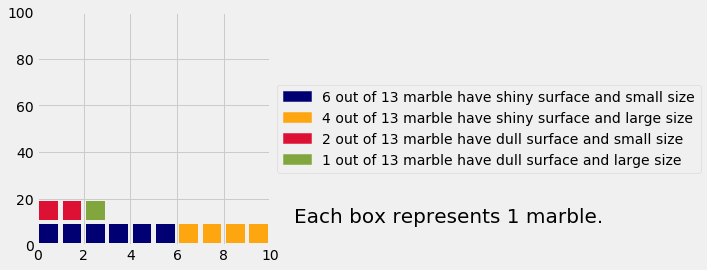

In [8]:
# Run this cell.
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble")

You (the marble) should imagine that you are a random draw from these 13 icons.

The following is an icon array of the marbles, grouped **only by their surface (shiny/dull)**.

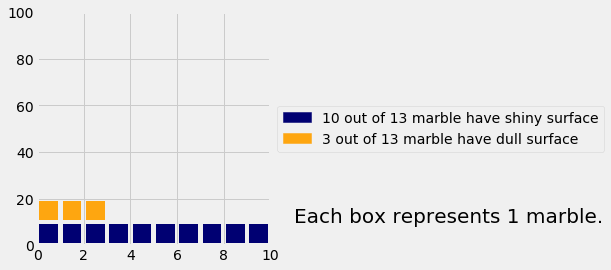

In [9]:
display_grouped_icon_array(marbles.group("surface"), "marble")

Knowing nothing else about yourself, you're equally likely to be any of the marbles pictured.

**Question 2.2.**<br/> What's the probability that you're a shiny marble?  Calculate this by hand (using Python for arithmetic) by looking at your icon array.

In [10]:
probability_shiny = 10/13

In [11]:
grade('tests/q22.py')

### 2.1. Conditional probability

Suppose you overhear Samantha saying that you're a large marble.  (Little-known fact: though marbles cannot see, they can sense sound from surface vibrations.)  Does this somehow change the chance that you're shiny?  Let's find out.

Go back to the full icon array, displayed below for convenience.

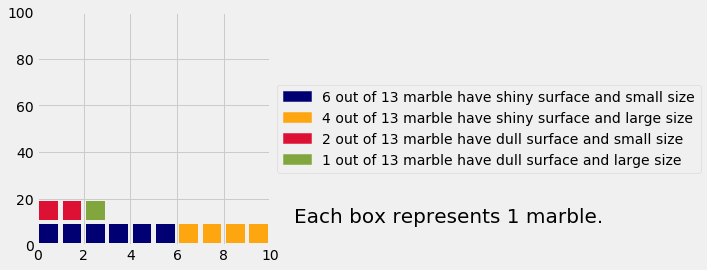

In [12]:
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble")

In question 2.3, we assumed you were equally likely to be any of the marbles, because we didn't know any better.  That's why we looked at all the marbles to compute the probability you were shiny.

But assuming you're a large marble, we can eliminate some of these possibilities.  In particular, you can't be a small shiny marble or a small dull marble.

You're still equally likely to be any of the remaining marbles, because you don't know anything that says otherwise.  So here's an icon array of those remaining possibilities:

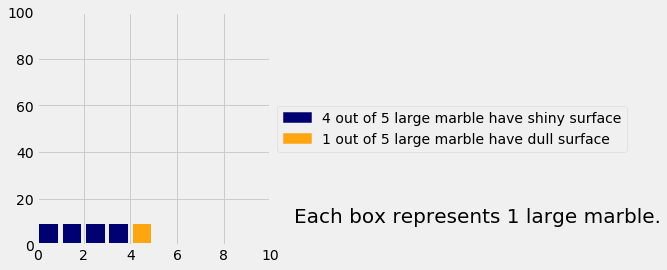

In [13]:
# Just run this cell.
display_grouped_icon_array(marbles.where("size", "large").group("surface"), "large marble")

**Question 2.1.1.** What's the probability you're a shiny marble, knowing that you're a large marble?  Calculate it by hand, using the icon array.

In [14]:
probability_shiny_given_large = 4/5

In [15]:
grade('tests/q211.py')

You should have found that this is different from the probability that you're a shiny marble (given no size information), which you computed earlier.  The distribution of surfaces among the large marbles is a little different from the distribution of surfaces among all the marbles.

**Question 2.1.2.** <br/>Suppose instead Samantha had said you're a **shiny** marble (hooray!).  What's the probability you're large?  Make an icon array to help you compute this probability, then compute it.

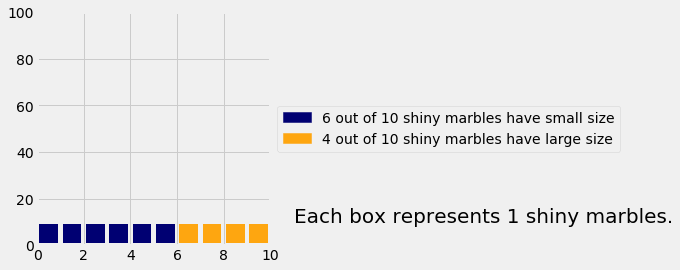

In [16]:
# An icon array to help you compute the answer.
display_grouped_icon_array(marbles.where("surface", "shiny").group("size"), "shiny marbles")

In [18]:
# Now compute the answer.
probability_large_given_shiny = 4/10

In [19]:
grade('tests/q212.py')

**Question 2.1.3.** <br/>Can you answer the last two questions just by looking at the full icon array?  (You can run the cell below to see it again.). If you can, how? If not, why not? Check with your lab peers to see if you are on the right track. 

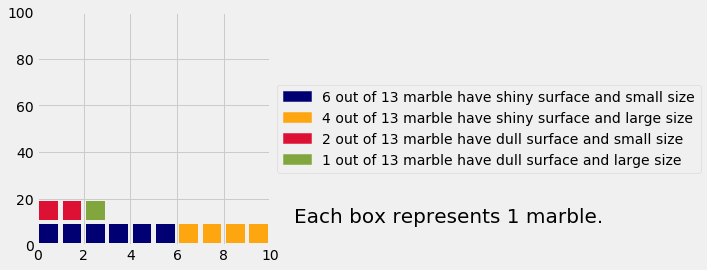

In [20]:
# Just run this cell.  The next cell is where you should write your answer.
display_grouped_icon_array(marbles.group(["surface", "size"]), "marble")

*Write your answer here, replacing this text.*

Yes, we can answer the two questions by looking at the icon array of the full dataset. That's because the original data consists of each individual marble and its size/surface attributes. We can selectively choose the ones that are relevant to our question and discard the rest of the marbles. That allows us to narrow down our available set of marbles for that question and hence allows us to calculate the (new) probability.

## 3. Cancer screening
Now let's look at a much more realistic application.

### Background
Medical tests are an important but surprisingly controversial topic.  For years, women have been advised to get regular mammograms (tests for breast cancer).  Today, there is controversy over whether the tests are useful at all.

Part of the problem with such tests is that they are not perfectly reliable.  Someone without cancer, or with only a benign form of cancer, can see a positive result on a test for cancer.  Someone with cancer can receive a negative result.  ("Positive" means "pointing toward cancer," so in this context it's bad!)  Doctors and patients often deal poorly with the first case, called *false positives*.  For example, a patient may receive dangerous treatment like chemotherapy or radiation despite having no cancer or, as happens more frequently, having a cancer that would not have impacted her health.

Conditional probability is a good way to think about such situations.  For example, you can compute the chance that you have cancer, given the result of a test, by combining information from different probability distributions.  You'll see that the chance you have cancer can be far from 100% even if you have a positive test result from a test that is usually accurate.

### 3.1. Basic cancer statistics
Suppose that, in a representative group of 10,000 people who are tested for cancer ("representative" meaning that the frequencies of different things are the same as the frequencies in the whole population):
1. 100 have cancer.
2. Among those 100, 90 have positive results on a cancer test and 10 have negative results.  ("Negative" means "not pointing toward cancer.")
3. The other 9,900 don't have cancer.
4. Among these, 198 have positive results on a cancer test and the other 9,702 have negative results.  (So 198 see "false positive" results.)

Below we've generated a table with data from these 10,000 hypothetical people.

In [21]:
people = Table().with_columns(
    "cancer status", ["sick", "sick", "healthy", "healthy"],
    "test status", ["positive", "negative", "positive", "negative"],
    "count", [90, 10, 198, 9702])
people

cancer status,test status,count
sick,positive,90
sick,negative,10
healthy,positive,198
healthy,negative,9702


One way to visualize this dataset is with a contingency table, which you've seen before.

**Question 3.1.1.** <br/>Create a contingency table that looks like this:

|cancer status|negative|positive|
|-|-|-|
|sick|||
|healthy||||

...with the **count** of each group filled in, according to what we've told you above.  The counts in the 4 boxes should sum to 10,000.

*Hint:* Use `pivot` with the `sum` function.

In [24]:
cancer = people.pivot("test status", 'cancer status', values = "count", collect= sum)
cancer

cancer status,negative,positive
healthy,9702,198
sick,10,90


In [25]:
grade('tests/q311.py')

Here is the `people` data in an icon array.

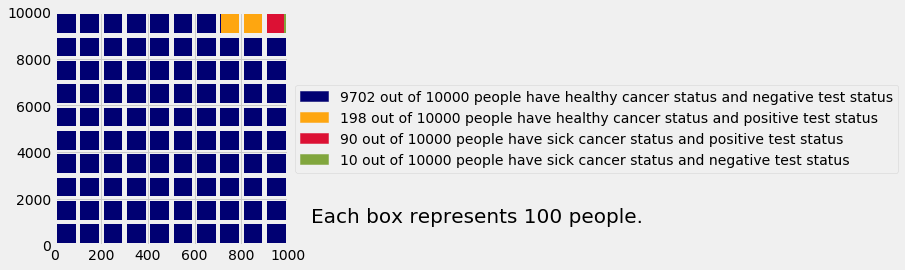

In [27]:
display_grouped_icon_array(people, "people")

Now let's think about how you can use this kind of information when you're tested for cancer.

Before you know any information about yourself, you could imagine yourself as a **uniform random sample** of one of the 10,000 people in this imaginary population of people who have been tested.

What's the chance that you have cancer, knowing nothing else about yourself?  It's $\frac{100}{10000}$, or 1%.  We can see that more directly with this icon array:

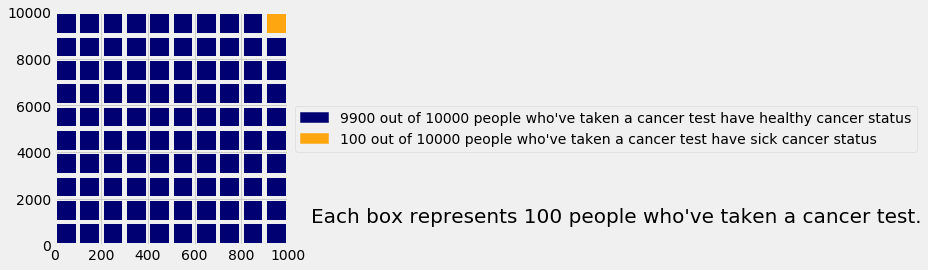

In [28]:
by_health = people.select(0, 2).group(0, sum).relabeled(1, 'count')
display_grouped_icon_array(by_health, "people who've taken a cancer test")

**Question 3.1.3.** <br/>What's the chance that you have a positive test result, knowing nothing else about yourself?

*Hint:* Make an icon array.

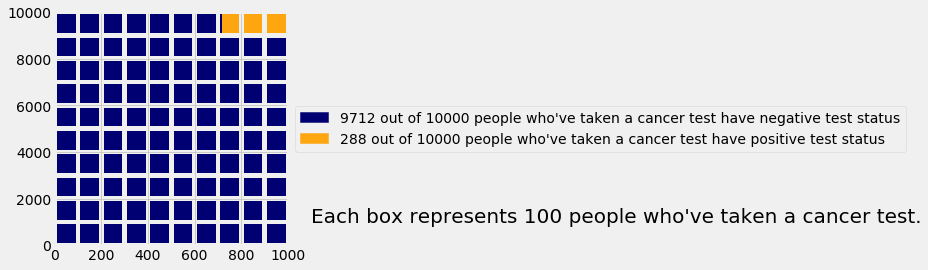

In [32]:
#First, make an icon table similar to the one above
#by_test should be almost the same thing as by_health above
#The only difference is the columns we need from the people table
by_test = people.select(1, 2).group(0, sum).relabeled(1,"count")
display_grouped_icon_array(by_test, "people who've taken a cancer test")

In [33]:
# Fill in the probabiliy of having a positive test result.
probability_positive_test = 288/10000

In [34]:
grade('tests/q313.py')

### 3.2. Interpreting test results
Suppose you have a positive test result.  This means you can now narrow yourself down to being part of one of two groups:
1. The people with cancer who have a positive test result.
2. The people without cancer who have a positive test result.

Here's an icon array for those two groups:

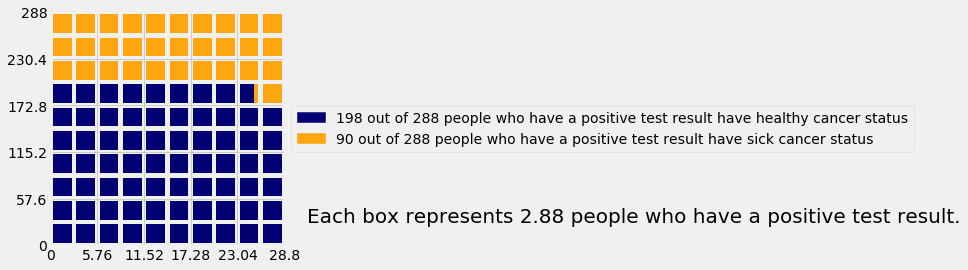

In [35]:
# Just run this cell.
display_grouped_icon_array(people.where("test status", are.equal_to("positive")).drop(1), "people who have a positive test result")

The *conditional probability* that you have cancer *given* your positive test result is the chance that you're in the first group, assuming you're in one of these two groups.

**Question 3.2.1.** <br/>Eyeballing it, is the conditional probability that you have cancer given your positive test result closest to:

9/10

2/3

1/2

1/3

1/100


In [36]:
# Set this to one of the probabilities above.
rough_prob_sick_given_positive = 1/3

In [37]:
grade('tests/q321.py')

**Question 3.2.2.** <br/>Now write code to calculate that probability exactly, using the original contingency table you wrote (the `cancer` table).

In [38]:
#Run this cell to take another look at the cancer cell
cancer

cancer status,negative,positive
healthy,9702,198
sick,10,90


In [45]:
prob_sick_given_positive = cancer.where("cancer status", "sick").select(2).column(0).item(0)/np.sum(cancer.column(2))
prob_sick_given_positive

0.3125

In [46]:
grade('tests/q322.py')

**Question 3.2.3.** <br/>Look at the full icon array again.  Using that, how would you compute (roughly) the conditional probability of cancer given a positive test?

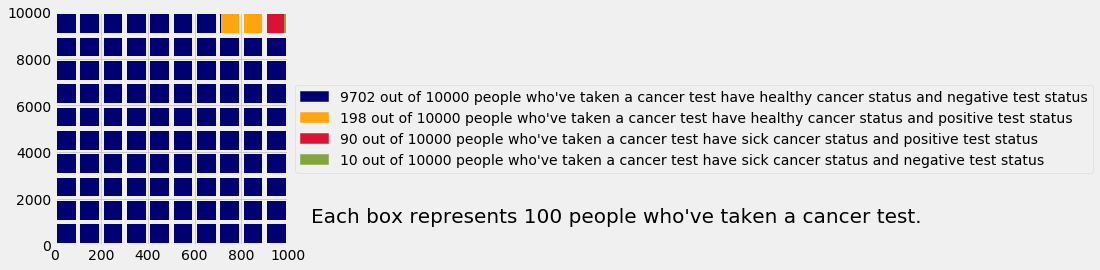

In [47]:
# The full icon array is given here for your convenience.
# Write your answer in the next cell.
display_grouped_icon_array(people, "people who've taken a cancer test")

*Write your answer here, replacing this text.*

Filter out the data to only retain the cases that had a positive result (=198+90). Then, out of these, find the number of cases that came out to be sick (=90). Divide the two.

**Question 3.2.4.** <br/>Is your answer to question 3.2.2 bigger than the overall proportion of people in the population who have cancer?  Does that make sense? Check with your peers in lab to see if you have the right idea. 

*Write your answer here, replacing this text.*

Yes, the conditional probability is higher than the overall probability of cancer(sick/total = (90+10)/10000), because the conditional probability excludes cases that didn't have a positive test result from being considered in the probability calculation and that is a major portion of the data. Since the domain is much smaller than the original population, the proportions will be higher as well.

# 4. Tree diagrams
A tree diagram is another useful visualization for conditional probability.  It is easiest to draw a tree diagram when the probabilities are presented in a slightly different way.  For example, people often summarize the information in your `cancer` table using 3 numbers:

1. The overall probability of having cancer is **`p_cancer`**.  (This is called the *base rate* or *marginal probability* of the disease.)
2. Given that you have cancer, the probability of a positive test result is **`p_pos_given_cancer`**.  (This is called the *sensitivity* of the test.  Higher values of `p_pos_given_cancer` mean the test is more useful.)
3. Given that you don't have cancer, the probability of a positive test result is **`p_pos_given_nocancer`**.  (This is called the *false positive rate* of the test.  Higher values of `p_pos_given_nocancer` mean the test is less useful.)

You already saw that the base rate of cancer was .01 in the previous section.  `p_pos_given_cancer` and `p_pos_given_nocancer` can be computed using the same method you used to compute the conditional probability of cancer given a positive test result.

Use the tree diagram below and think about 

This corresponds to this tree diagram:

                      / \
                 .99 /   \ .01
                    /     \ 
                   /       \
              no cancer    cancer
                / \         / \
               /   \       /   \
              /     \     /     \
             +       -   +       -

**Question 4.1.** <br/>Compute `p_pos_given_cancer` and `p_pos_given_nocancer` for the data in section 3.  

**Use Bayes Rule**

You can read about a technique called Bayes Rule in the [course textbook](https://www.inferentialthinking.com/chapters/18/1/more-likely-than-not-binary-classifier.html#Bayes%27-Rule).

In [51]:
# Hint: You may find these two tables useful:
has_cancer = cancer.where("cancer status", are.equal_to("sick"))
no_cancer = cancer.where("cancer status", are.equal_to("healthy"))

p_cancer = .01
p_pos_given_cancer = has_cancer.where()
p_pos_given_nocancer = ...

print('Probability of Cancer:', p_cancer, '\nProbability of a positive test given no cancer:', p_pos_given_cancer, 
      '\nProbability of a positive test given no cancer:', p_pos_given_nocancer)

TypeError: where() missing 1 required positional argument: 'column_or_label'

In [ ]:
grade('tests/q41.py')

Once you are done...
- **Save and Checkpoint** from the `File` menu.